In [1]:
%load_ext autoreload
%autoreload 2
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
from lib_nn_dpe import NN_dpe
from IPython import display

import serial
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"

In [62]:
dpe.power_off()

Running <function DPE.power_off at 0x0E0336A8> with serial
[INFO] Elapsed time = 0.01s
Serial disconnected


In [91]:
dpe = DPE('COM6')

Running <function DPE.init_dut at 0x0FF37780> with serial
DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
[ERROR] SPI return wrong value
[INFO] Elapsed time = 0.03s
Serial disconnected


In [92]:
dpe.set_clock(50)

Running <function DPE.set_clock at 0x0FF378A0> with serial
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz
[INFO] Elapsed time = 0.00s
Serial disconnected


Running <function DPE.read at 0x0FF37930> with serial
[INFO] Elapsed time = 0.28s
Serial disconnected


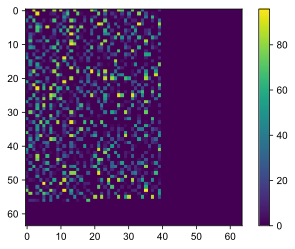

In [26]:
g = dpe.read(0)
plt.imshow(g * 1e6)
plt.colorbar()

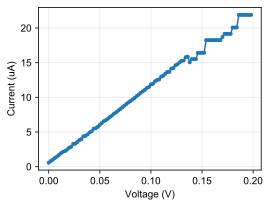

In [87]:
ar=0
r=51
c=5

Tsh_list = np.arange(0, 255, 5)
Vgate = 5
Vread = 0.1

Vreads = np.arange(0,0.2, 0.002)

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs = []
    for Vr in Vreads:
        currs.append( dpe.a0.read_single_int(Vr, Vgate, array=ar, row=r, col=c, gain=-1) )

plt.figure(figsize=(4,3))

plt.plot(Vreads, [i* 1e6 for i in currs], '.-')
    
plt.ylabel('Current (uA)')
plt.xlabel('Voltage (V)')
plt.grid(True, alpha=0.3)

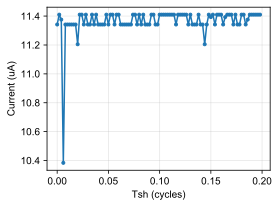

In [75]:
ar=0
r=51
c=5

Tsh_list = np.arange(0, 255, 5)
Vgate = 5
Vread = 0.1

Vreads = np.arange(0,0.2, 0.002)

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs = []
    for Vr in Vreads:
        currs.append( dpe.a0.pic_read_single(Vread=0.1, Vgate=Vgate, array=ar, row=r, col=c, gain=-1) )

plt.figure(figsize=(4,3))

plt.plot(Vreads, [i* 1e6 for i in currs], '.-')
    
plt.ylabel('Current (uA)')
plt.xlabel('Tsh (cycles)')
plt.grid(True, alpha=0.3)

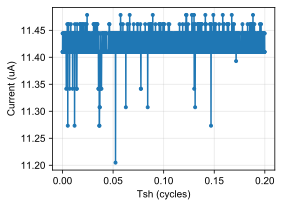

In [78]:
ar=0
r=51
c=5

Tsh_list = np.arange(0, 255, 5)
Vgate = 5
Vread = 0.1

Vreads = np.arange(0,0.2, 0.0001)

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs = []
    
    _ = dpe.a0.pic_read_single(Vread=Vread, Vgate=Vgate, array=ar, row=r, col=c, gain=-1)
    for Vr in Vreads:
        currs.append( dpe.a0.pic_read_single(Vread=0.1, Vgate=Vgate, array=ar, row=r, col=c, gain=-1, skip_conf=True) )

plt.figure(figsize=(4,3))

plt.plot(Vreads, [i* 1e6 for i in currs], '.-')
    
plt.ylabel('Current (uA)')
plt.xlabel('Tsh (cycles)')
plt.grid(True, alpha=0.3)

In [86]:
ar=0
r=51
c=5

Vgate = 5
Vread = 0.1

Vreads = np.arange(0,0.2, 0.0001)

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs = dpe.a0.pic_read_batch(0, Vread=Vread, gain=-1)
#     for Vr in Vreads:
#         currs.append( dpe.a0.pic_read_single(Vread=0.1, Vgate=Vgate, array=ar, row=r, col=c, gain=-1, skip_conf=True) )

# plt.figure(figsize=(4,3))

# plt.plot(Vreads, [i* 1e6 for i in currs], '.-')
    
# plt.ylabel('Current (uA)')
# plt.xlabel('Tsh (cycles)')
# plt.grid(True, alpha=0.3)

print(currs[r,c])

1.141006842619746e-05


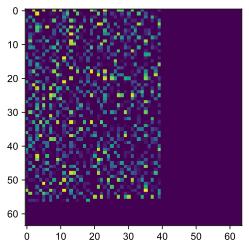

In [71]:
plt.imshow(currs)

In [93]:
ar=0
# r=51
# c=5

# Vgate = 5
# Vread = 0.1

Vreads = np.arange(0,0.2, 0.002)

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs_all = []
    for Vr in Vreads:
        currs = dpe.a0.pic_read_batch(ar, Vread=Vr, gain=-1)
        currs_all.append(currs)


currs_all = np.array(currs_all)

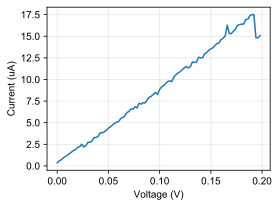

In [98]:
plt.figure(figsize=(4,3))

plt.plot(Vreads, currs_all[:,r,c] * 1e6)
    
plt.ylabel('Current (uA)')
plt.xlabel('Voltage (V)')
plt.grid(True, alpha=0.3)

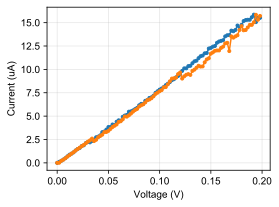

In [106]:
ar=0
r=0
c=2

Tsh_list = np.arange(0, 255, 5)
Vgate = 5
Vread = 0.1

Vreads = np.arange(0,0.2, 0.002)

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs = []
    for Vr in Vreads:
        currs.append( dpe.a0.read_single_int(Vr, Vgate, array=ar, row=r, col=c, gain=-1) )

plt.figure(figsize=(4,3))

plt.plot(Vreads, [i* 1e6 for i in currs], '.-')
plt.plot(Vreads, currs_all[:,r,c] * 1e6, '.-')
    
plt.ylabel('Current (uA)')
plt.xlabel('Voltage (V)')
plt.grid(True, alpha=0.3)